# EDA и анализ данных

Этот ноутбук содержит исследовательский анализ данных (EDA) из проекта кредитного скоринга

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_parquet(r"D:\jupiter\ypiter\final_xgboost_scoring\data\dataset.parquet")
print(df.head())

   borrow_block_number  borrow_timestamp  \
0              7711117      1.557197e+09   
1              7711123      1.557197e+09   
2              7711126      1.557197e+09   
3              7711672      1.557205e+09   
4              7712572      1.557217e+09   

                               wallet_address  first_tx_timestamp  \
0  0x502cb8985b2c92a8d4bf309cdaa89de9be442708        1.537224e+09   
1  0x502cb8985b2c92a8d4bf309cdaa89de9be442708        1.537224e+09   
2  0x502cb8985b2c92a8d4bf309cdaa89de9be442708        1.537224e+09   
3  0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6        1.557191e+09   
4  0xbd9ed130a53cfafcf81502e4d35329a6c4d53410        1.557217e+09   

   last_tx_timestamp  wallet_age  incoming_tx_count  outgoing_tx_count  \
0       1.557197e+09  19973049.0                199                438   
1       1.557197e+09  19973188.0                200                439   
2       1.557197e+09  19973238.0                201                440   
3       1.557198e+09    

In [4]:
df.head()

,borrow_block_number,borrow_timestamp,wallet_address,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,...,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count,target
0,7711117,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973049.0,199,438,-239,0.397391,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,1
1,7711123,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973188.0,200,439,-239,0.399063,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
2,7711126,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973238.0,201,440,-239,0.400895,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
3,7711672,1.557205e+09,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,1.557191e+09,1.557198e+09,13922.0,8,56,-48,0.604001,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,0
4,7712572,1.557217e+09,0xbd9ed130a53cfafcf81502e4d35329a6c4d53410,1.557217e+09,1.557217e+09,264.0,2,3,-1,0.003008,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,0


In [5]:
print("Размер датасета:", df.shape)

Размер датасета: (442961, 78)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442961 entries, 0 to 442960
Data columns (total 78 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   borrow_block_number                      442961 non-null  int64  
 1   borrow_timestamp                         442961 non-null  float64
 2   wallet_address                           442961 non-null  object 
 3   first_tx_timestamp                       442961 non-null  float64
 4   last_tx_timestamp                        442961 non-null  float64
 5   wallet_age                               442961 non-null  float64
 6   incoming_tx_count                        442961 non-null  int64  
 7   outgoing_tx_count                        442961 non-null  int64  
 8   net_incoming_tx_count                    442961 non-null  int64  
 9   total_gas_paid_eth                       442961 non-null  float64
 10  avg_gas_paid_per_tx_eth         

In [7]:
print("Пропущенные значения:")
print(df.isnull().sum())

Пропущенные значения:
borrow_block_number              0
borrow_timestamp                 0
wallet_address                   0
first_tx_timestamp               0
last_tx_timestamp                0
                                ..
market_rocp                      0
market_rocr                      0
unique_borrow_protocol_count     0
unique_lending_protocol_count    0
target                           0
Length: 78, dtype: int64


In [8]:
df['target'].value_counts()

target
0    276761
1    166200
Name: count, dtype: int64

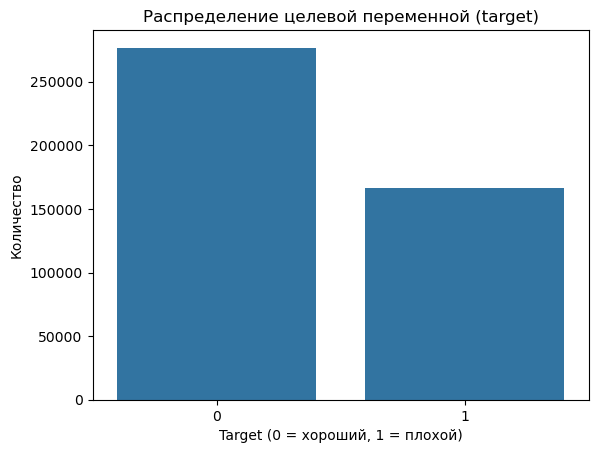

In [10]:
sns.countplot(x='target', data=df)
plt.title('Распределение целевой переменной (target)')
plt.xlabel('Target (0 = хороший, 1 = плохой)')
plt.ylabel('Количество')
plt.show()

In [11]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('target')  # Уберём целевую переменную из списка

df.groupby('target')[numeric_cols].mean()

,borrow_block_number,borrow_timestamp,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,...,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count
target,,,,,,,,,,,,,,,,,,,,,
0,1.325344e+07,1.631949e+09,1.595506e+09,1.631816e+09,3.644280e+07,635.841892,2102.846311,-1467.004419,26.192312,0.015049,...,22.601182,-0.656664,6.114854,23.268141,1126.828201,2.015394,0.036974,1.036974,0.938586,1.221722
1,1.270874e+07,1.624688e+09,1.591432e+09,1.624629e+09,3.325553e+07,1014.347924,2351.719110,-1337.371185,28.074455,0.016744,...,24.939998,-0.641225,6.082346,23.417411,954.409993,2.027969,0.041072,1.041072,1.035860,1.227106


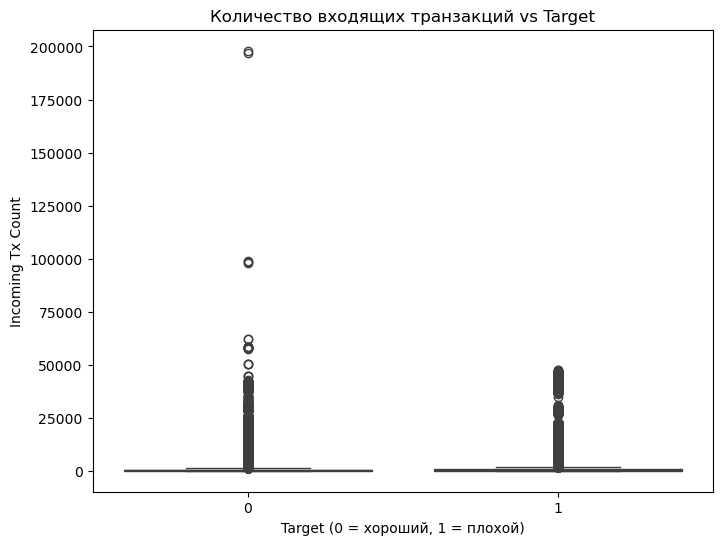

In [12]:
# График boxplot: incoming_tx_count vs target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='incoming_tx_count', data=df)
plt.title('Количество входящих транзакций vs Target')
plt.xlabel('Target (0 = хороший, 1 = плохой)')
plt.ylabel('Incoming Tx Count')
plt.show()

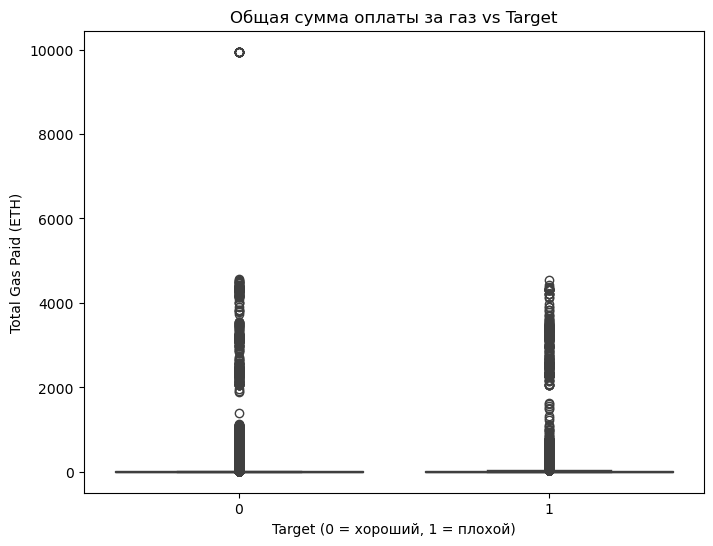

In [13]:
# График boxplot: total_gas_paid_eth vs target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='total_gas_paid_eth', data=df)
plt.title('Общая сумма оплаты за газ vs Target')
plt.xlabel('Target (0 = хороший, 1 = плохой)')
plt.ylabel('Total Gas Paid (ETH)')
plt.show()

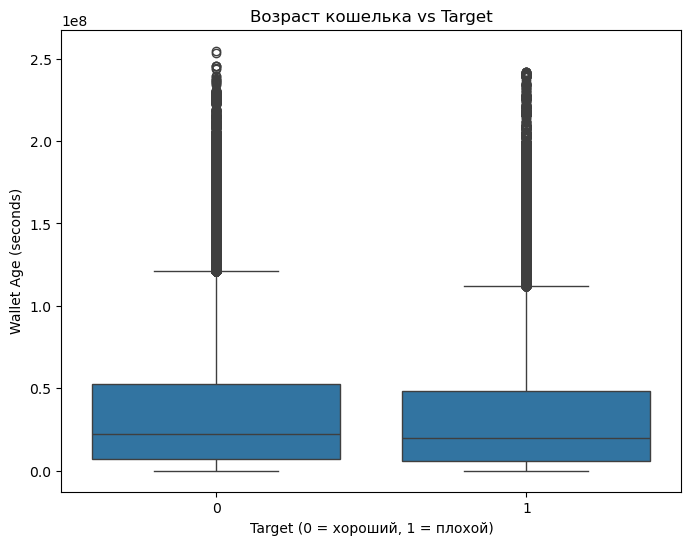

In [14]:
# График boxplot: wallet_age vs target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='wallet_age', data=df)
plt.title('Возраст кошелька vs Target')
plt.xlabel('Target (0 = хороший, 1 = плохой)')
plt.ylabel('Wallet Age (seconds)')
plt.show()

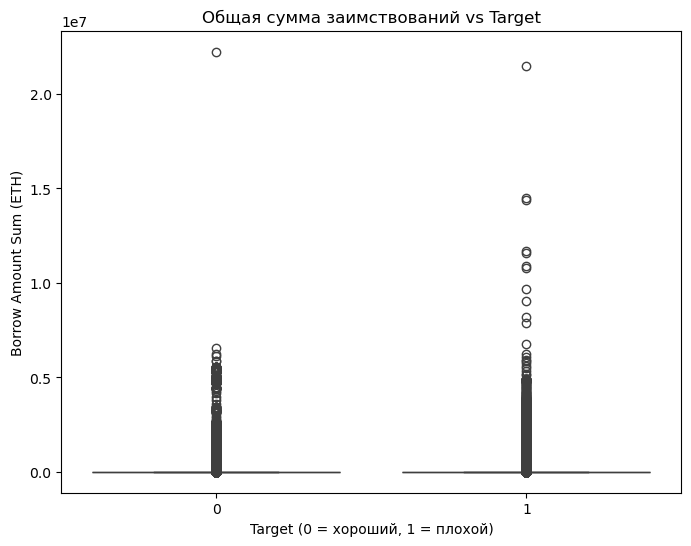

In [15]:
# График boxplot: borrow_amount_sum_eth vs target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='borrow_amount_sum_eth', data=df)
plt.title('Общая сумма заимствований vs Target')
plt.xlabel('Target (0 = хороший, 1 = плохой)')
plt.ylabel('Borrow Amount Sum (ETH)')
plt.show()

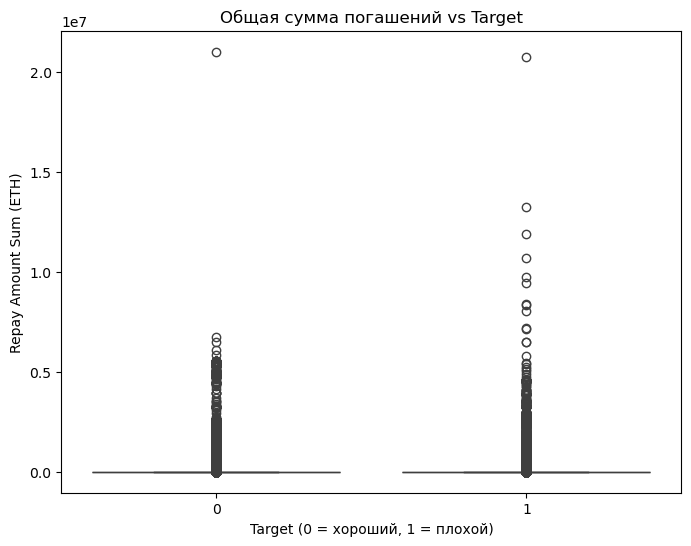

In [16]:
# График boxplot: repay_amount_sum_eth vs target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='repay_amount_sum_eth', data=df)
plt.title('Общая сумма погашений vs Target')
plt.xlabel('Target (0 = хороший, 1 = плохой)')
plt.ylabel('Repay Amount Sum (ETH)')
plt.show()

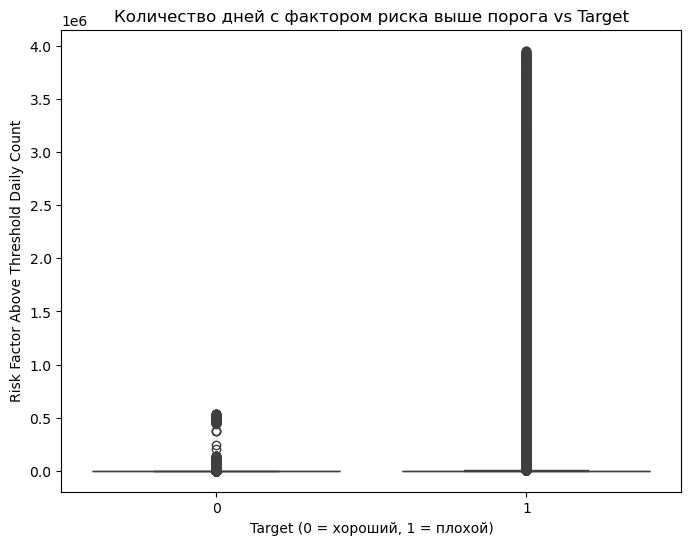

In [17]:
# График boxplot: risk_factor_above_threshold_daily_count vs target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='risk_factor_above_threshold_daily_count', data=df)
plt.title('Количество дней с фактором риска выше порога vs Target')
plt.xlabel('Target (0 = хороший, 1 = плохой)')
plt.ylabel('Risk Factor Above Threshold Daily Count')
plt.show()

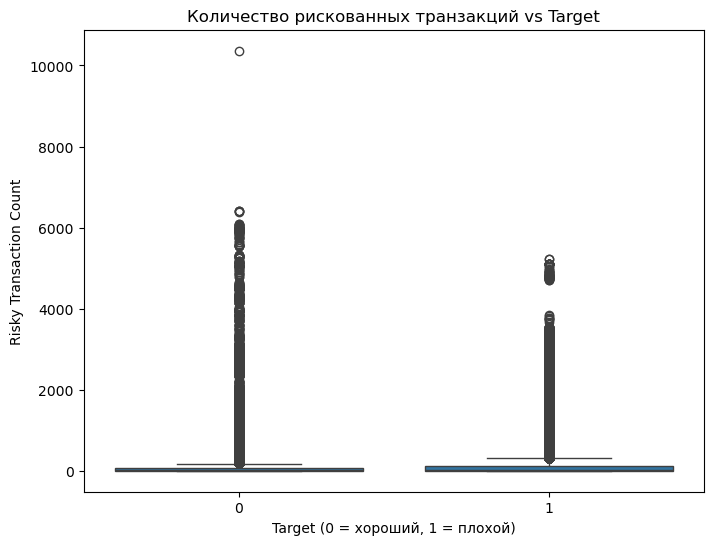

In [18]:
# График boxplot: risky_tx_count vs target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='risky_tx_count', data=df)
plt.title('Количество рискованных транзакций vs Target')
plt.xlabel('Target (0 = хороший, 1 = плохой)')
plt.ylabel('Risky Transaction Count')
plt.show()

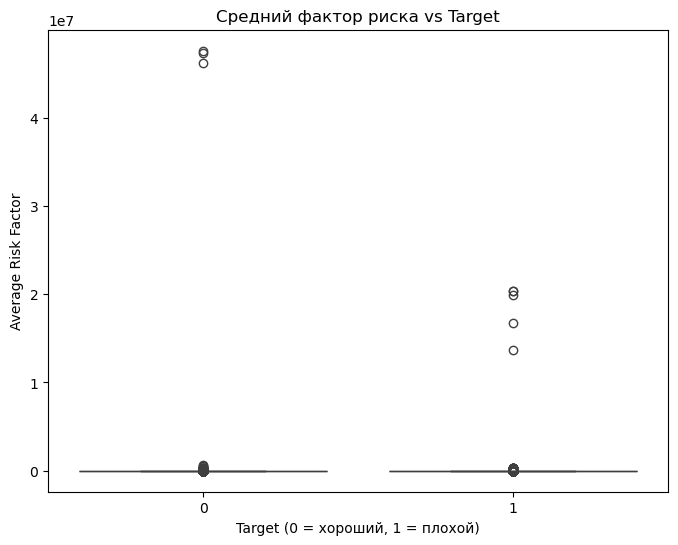

In [19]:
# График boxplot: avg_risk_factor vs target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='avg_risk_factor', data=df)
plt.title('Средний фактор риска vs Target')
plt.xlabel('Target (0 = хороший, 1 = плохой)')
plt.ylabel('Average Risk Factor')
plt.show()

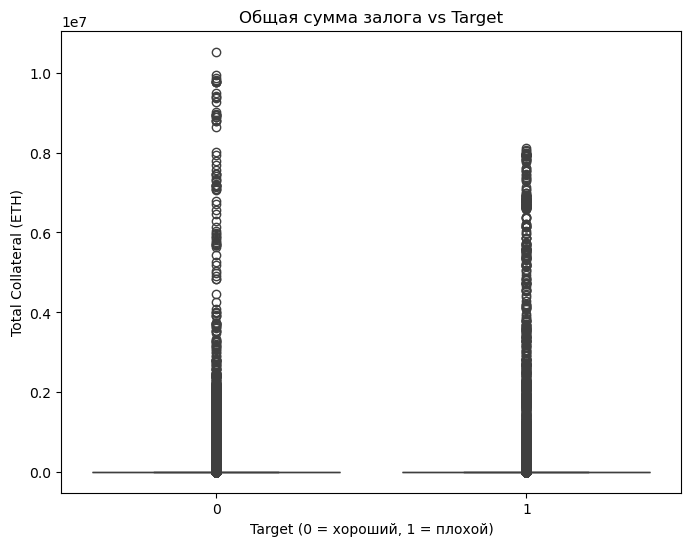

In [20]:
# График boxplot: total_collateral_eth vs target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='total_collateral_eth', data=df)
plt.title('Общая сумма залога vs Target')
plt.xlabel('Target (0 = хороший, 1 = плохой)')
plt.ylabel('Total Collateral (ETH)')
plt.show()

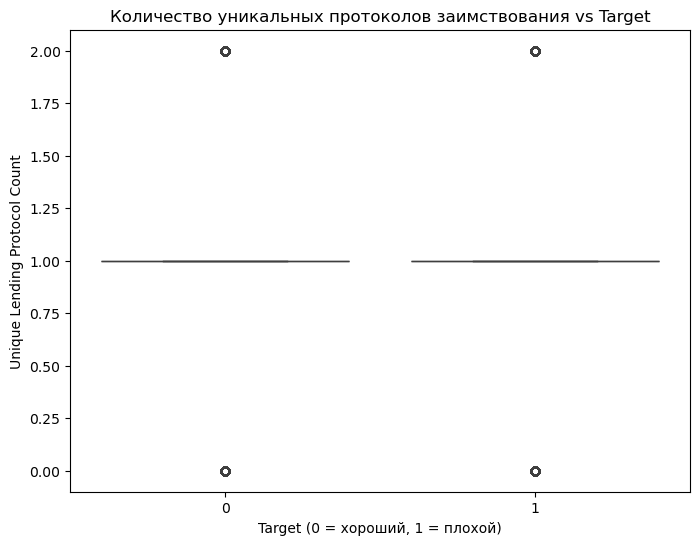

In [21]:
# График boxplot: unique_lending_protocol_count vs target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='unique_lending_protocol_count', data=df)
plt.title('Количество уникальных протоколов заимствования vs Target')
plt.xlabel('Target (0 = хороший, 1 = плохой)')
plt.ylabel('Unique Lending Protocol Count')
plt.show()

In [24]:
# 1. Выбираем важные признаки
selected_features = [
    'risky_tx_count',
    'avg_risk_factor',
    'total_collateral_eth',
    'risk_factor_above_threshold_daily_count',
    'unique_lending_protocol_count',
    'incoming_tx_count',
    'borrow_amount_sum_eth',
    'repay_amount_sum_eth',
    'wallet_age',
    'total_gas_paid_eth'
]

In [25]:
# 2. Создаём матрицу признаков X и целевую переменную y
X = df[selected_features]
y = df['target']

In [28]:
# Делим на train+val и test
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Делим на train и val
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.2, stratify=y_tv, random_state=42)

In [29]:
# Создаём объект для масштабирования
scaler = StandardScaler()

# Масштабируем обучающую выборку
X_train_scaled = scaler.fit_transform(X_train)

# Масштабируем валидационную и тестовую выборки на основе статистик train
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [30]:
print("Баланс классов в y_train:")
print(y_train.value_counts(normalize=True))

Баланс классов в y_train:
target
0    0.624796
1    0.375204
Name: proportion, dtype: float64


In [31]:
# Создаём DataFrame из масштабированных данных
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=selected_features)

# Смотрим статистику
print("Среднее значение признаков:")
print(X_train_scaled_df.mean())

print("\nСтандартное отклонение признаков:")
print(X_train_scaled_df.std())

Среднее значение признаков:
risky_tx_count                             6.717089e-18
avg_risk_factor                            2.443717e-19
total_collateral_eth                       1.176117e-17
risk_factor_above_threshold_daily_count   -3.483864e-18
unique_lending_protocol_count              1.286523e-16
incoming_tx_count                          9.574359e-18
borrow_amount_sum_eth                     -3.258290e-19
repay_amount_sum_eth                       1.402318e-17
wallet_age                                -6.331107e-17
total_gas_paid_eth                        -5.313518e-18
dtype: float64

Стандартное отклонение признаков:
risky_tx_count                             1.000002
avg_risk_factor                            1.000002
total_collateral_eth                       1.000002
risk_factor_above_threshold_daily_count    1.000002
unique_lending_protocol_count              1.000002
incoming_tx_count                          1.000002
borrow_amount_sum_eth                      1.00000

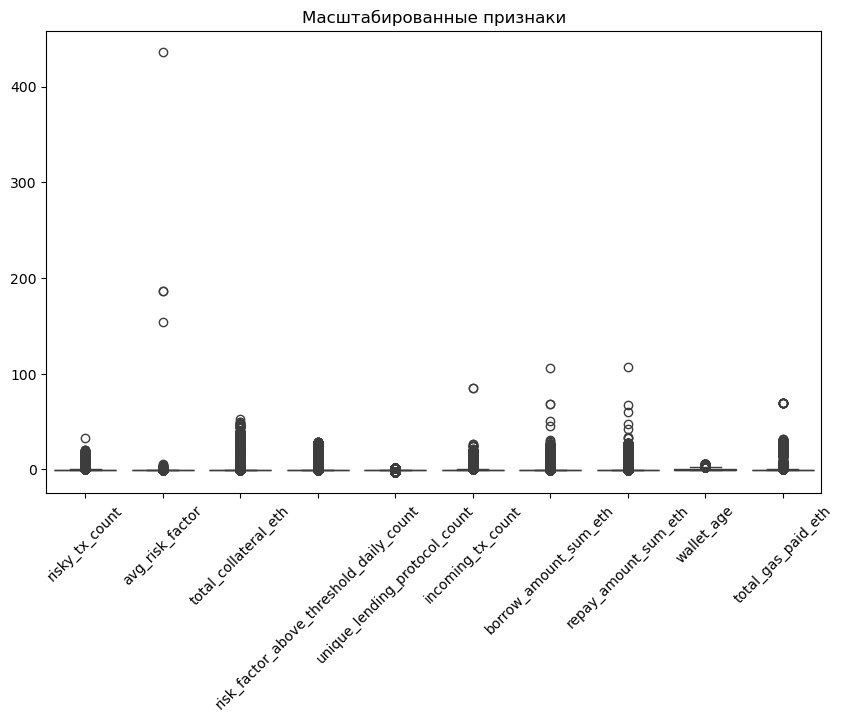

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train_scaled_df)
plt.title('Масштабированные признаки')
plt.xticks(rotation=45)
plt.show()